# **Season Length & Duration Strategy: Platform Preferences and Genre Longevity**

This notebook explores **how streaming platforms structure their TV content** in terms of season count and content lifespan. It evaluates platform commitment to multi-season arcs, identifies which genres thrive over longer runs, and reveals underutilized areas for strategic expansion.

### **Core Questions**
- Do platforms prefer single-season or multi-season content?
- Which genres are most likely to receive long-term support?
- Are longer shows more critically successful?
- Where are the opportunity gaps by genre and service?

---

### **Key Analysis Blocks & Insights**

#### **1. Short vs Long Shows (≤2 vs >2 Seasons)**
Netflix and Amazon Prime favor shorter runs, while Disney+ and Hulu+ invest more in long-term arcs.

#### **2. Short vs Long Shows (≤1 vs >1 Season)**
Over 50% of Netflix and Amazon Prime shows have only 1 season — indicative of a high-churn strategy.

#### **3. Season Distribution (≤5 Seasons)**
Disney+ focuses heavily on 3-season shows. Hulu+ maintains the most even spread from 1 to 5 seasons.

#### **4. Average Season Length by Genre**
Documentary and Family shows tend to last longer — especially on Hulu+ and HBO Max. Animation and Anime are more short-lived.

#### **5. Average Seasons by Genre × Platform**
Hulu+ supports extended runs for Drama and Documentary, while HBO Max backs long-running Comedies.

#### **6. Survival Curves (≤5 Seasons)**
Netflix drops off sharply after 1–2 seasons. Hulu+ and Disney+ exhibit flatter curves — suggesting stronger renewal pipelines.

#### **7. Trends Over Time (2010–Present)**
Average season count is declining on Netflix. IMDB scores remain highest on HBO Max and Hulu+.

#### **8. Seasons vs IMDB Score**
Longer series do not necessarily guarantee higher ratings — most cluster around 6–8 regardless of length.

#### **9. Season Count Distribution (All Shows)**
Peaks at 1 and 2 seasons across all services. Hulu+ and HBO Max carry more multi-season outliers.

#### **10. Longest-Running Shows (Top 20%)**
Netflix and Hulu+ host most long-running content. HBO Max offers fewer but more highly rated long-form shows.

#### **11. High-Rated Genres (IMDB ≥ 80th Percentile)**
Drama, Crime, and Documentary dominate high-rated categories. Hulu+ leads in high-rated Drama.

#### **12. Top Genres in High-Rated TV**
Drama, Crime, and Comedy are the most frequent genres among top-rated shows.

#### **13. Heatmap: High-Rated Genre × Platform**
Hulu+ and HBO Max show strong genre loyalty in high-performing verticals (e.g., Drama, Documentary).

#### **14. Underrepresented Genres (Opportunity Gaps)**
Genres like War, Musical, and Talk Show are rare across all services — indicating untapped potential.



In [4]:
# ============================================
# SECTION 1: Setup & Drive Mount
# ============================================
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================================
# SECTION 2: Load Data
# ============================================
# Load processed top-5 service subset
df = pd.read_csv('/content/drive/MyDrive/DSO 574 - #3 Streaming Project/Dataset/final_top5.csv')

# Load full ReelGood dataset with title/service/genre/tags
full_df = pd.read_csv('/content/drive/MyDrive/DSO 574 - #3 Streaming Project/Dataset/ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv')

# ============================================
# SECTION 3: Basic Overview
# ============================================
# Show shape and columns
pd.set_option('display.max_columns', None)
print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())

# Show data types and missing values
print("\nData information:")
df.info()

# Sample preview
print("\nSample data:")
df.head()

# ============================================
# SECTION 4: Unique Values Exploration
# ============================================
# Unique genres
print("\nUnique Genres:")
print(df['Genre'].unique())

# Unique services
unique_services = df['Service'].unique()
print("\nUnique Services:", unique_services)
print("Number of Unique Services:", len(unique_services))

# ============================================
# SECTION 5: Seasons Column Analysis
# ============================================
# Unique values in 'Seasons'
print("\nUnique values in 'Seasons':")
print(df['Seasons'].unique())

# Rows with NaN in 'Seasons'
nan_seasons = df[df['Seasons'].isna()]
print("\nRows with missing 'Seasons':")
print(nan_seasons)

# Count missing values in 'Seasons'
nan_count = df['Seasons'].isna().sum()
print(f"\nNumber of rows with NaN in 'Seasons': {nan_count}")

# Count of shows with exactly 1 season
count_one_season = df[df['Seasons'] == 1].shape[0]
print(f"\nNumber of shows with exactly one season: {count_one_season}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-4-3607507479.py:19: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('/content/drive/MyDrive/DSO 574 - #3 Streaming Project/Dataset/ReelGood Data/Reel Good Data (Title+Service+Genre+Tag List).csv')


Dataset shape: (12327, 21)

Column names:
['Unnamed: 0', 'Title', 'URL', 'Type', 'Service', 'Genre', 'Tag', 'IMDB', 'ReelGood', 'AgeRating', 'Rated', 'Released Year', 'Duration Year', 'Seasons', "What it's about", 'Where to Watch', 'Rent or Buy Available', 'Exclusive Service', 'Has Tag', 'Rated_filled', 'AgeRating_filled']

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12327 entries, 0 to 12326
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12327 non-null  int64  
 1   Title                  12327 non-null  object 
 2   URL                    12327 non-null  object 
 3   Type                   12327 non-null  object 
 4   Service                12327 non-null  object 
 5   Genre                  12327 non-null  object 
 6   Tag                    12327 non-null  object 
 7   IMDB                   12036 non-null  float64
 8   ReelGood              

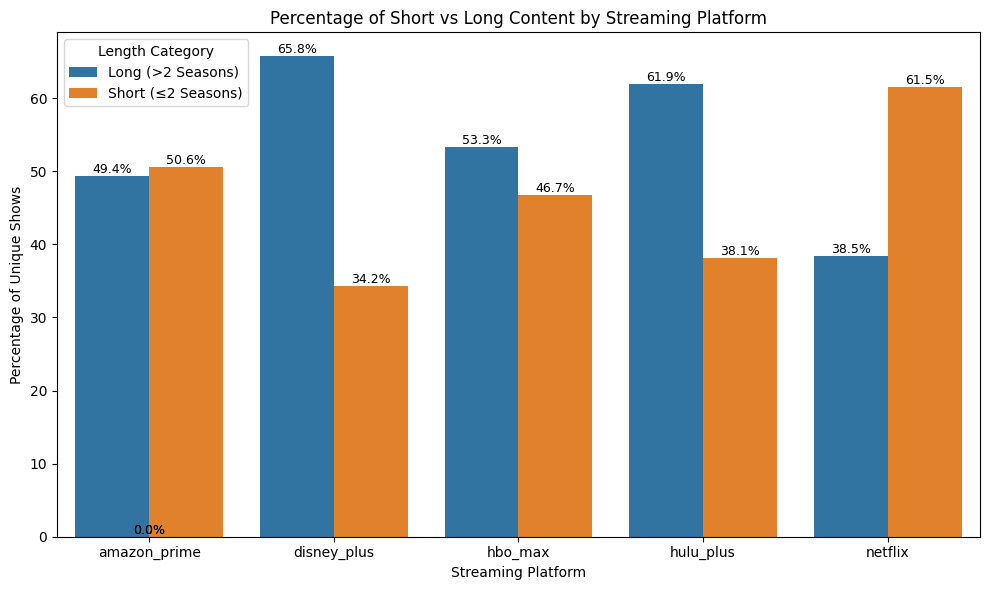

In [5]:
# ============================================
# SECTION 6: Season Length Categorization
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter TV shows and drop rows with missing season info
tv_shows = df[df['Type'] == 'tv'].copy().dropna(subset=['Seasons'])

# Deduplicate by Title + Service
tv_unique = tv_shows.groupby(['Title', 'Service'], as_index=False).agg({'Seasons': 'first'})

# Categorize shows by length (≤2 vs >2 seasons)
tv_unique['Length Category'] = tv_unique['Seasons'].apply(
    lambda x: 'Short (≤2 Seasons)' if x <= 2 else 'Long (>2 Seasons)'
)

# Count and normalize
length_counts = (
    tv_unique.groupby(['Service', 'Length Category'])
    .size().reset_index(name='Count')
)
length_counts['Percentage'] = (
    length_counts['Count'] / length_counts.groupby('Service')['Count'].transform('sum') * 100
).round(2)

# Plot: Short vs Long
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=length_counts, x='Service', y='Percentage', hue='Length Category')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)
plt.title('Percentage of Short vs Long Content by Streaming Platform')
plt.ylabel('Percentage of Unique Shows')
plt.xlabel('Streaming Platform')
plt.tight_layout()
plt.show()


In [6]:
# ============================================
# SECTION 7: Season Length & Duration Analysis
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter TV shows with valid 'Seasons'
tv_shows = df[df['Type'] == 'tv'].copy().dropna(subset=['Seasons'])

# Deduplicate to unique Title + Service
base_tv = tv_shows.groupby(['Title', 'Service'], as_index=False).agg({'Seasons': 'first'})


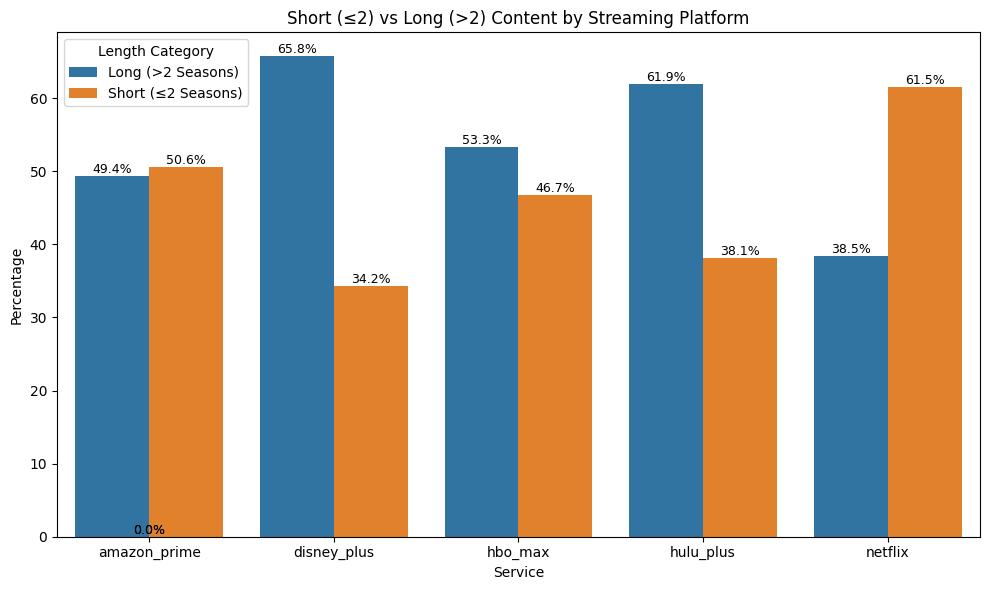

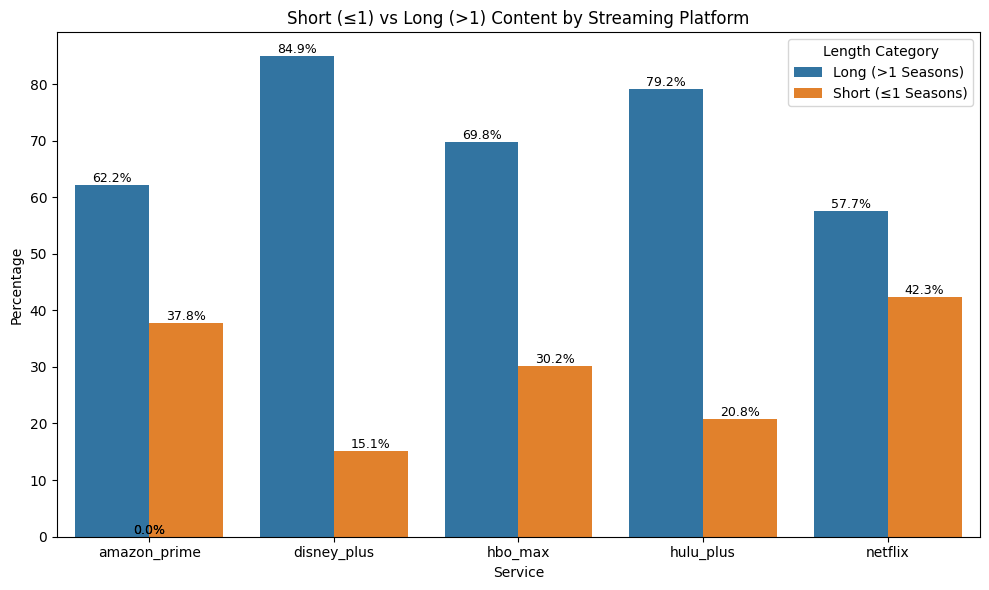

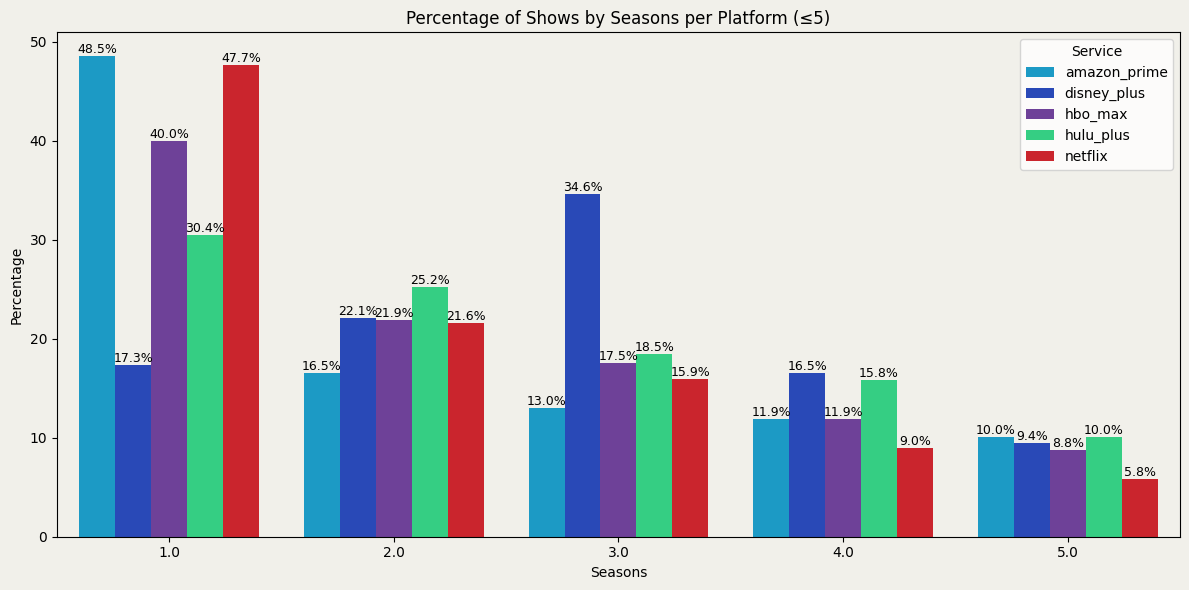

In [7]:
# --------------------------------------------------
# A1. Short vs Long Categorization (≤2 vs >2 seasons)
# --------------------------------------------------
tv_len2 = base_tv.copy()
tv_len2['Length Category'] = tv_len2['Seasons'].apply(lambda x: 'Short (≤2 Seasons)' if x <= 2 else 'Long (>2 Seasons)')
length_counts_2 = tv_len2.groupby(['Service', 'Length Category']).size().reset_index(name='Count')
length_counts_2['Percentage'] = (length_counts_2['Count'] / length_counts_2.groupby('Service')['Count'].transform('sum') * 100).round(2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=length_counts_2, x='Service', y='Percentage', hue='Length Category')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom', fontsize=9)
plt.title('Short (≤2) vs Long (>2) Content by Streaming Platform')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# A2. Alternate Threshold: Short ≤1 vs Long >1
# --------------------------------------------------
tv_len1 = base_tv.copy()
tv_len1['Length Category'] = tv_len1['Seasons'].apply(lambda x: 'Short (≤1 Seasons)' if x <= 1 else 'Long (>1 Seasons)')
length_counts_1 = tv_len1.groupby(['Service', 'Length Category']).size().reset_index(name='Count')
length_counts_1['Percentage'] = (length_counts_1['Count'] / length_counts_1.groupby('Service')['Count'].transform('sum') * 100).round(2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=length_counts_1, x='Service', y='Percentage', hue='Length Category')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom', fontsize=9)
plt.title('Short (≤1) vs Long (>1) Content by Streaming Platform')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# A3. Distribution of ≤5 Season Counts by Platform
# --------------------------------------------------
platform_palette = {
    'netflix': '#E50914', 'amazon_prime': '#00A8E1',
    'disney_plus': '#113CCF', 'hulu_plus': '#1CE783', 'hbo_max': '#6E32A7'
}
tv_filtered = base_tv[base_tv['Seasons'] <= 5]
season_dist = tv_filtered.groupby(['Service', 'Seasons']).size().reset_index(name='Count')
total = season_dist.groupby('Service')['Count'].transform('sum')
season_dist['Percentage'] = (season_dist['Count'] / total * 100).round(2)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=season_dist, x='Seasons', y='Percentage', hue='Service', palette=platform_palette)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom', fontsize=9)
fig = plt.gcf()
fig.patch.set_facecolor('#f1f0ea')
ax.set_facecolor('#f1f0ea')
plt.title('Percentage of Shows by Seasons per Platform (≤5)')
plt.tight_layout()
plt.show()

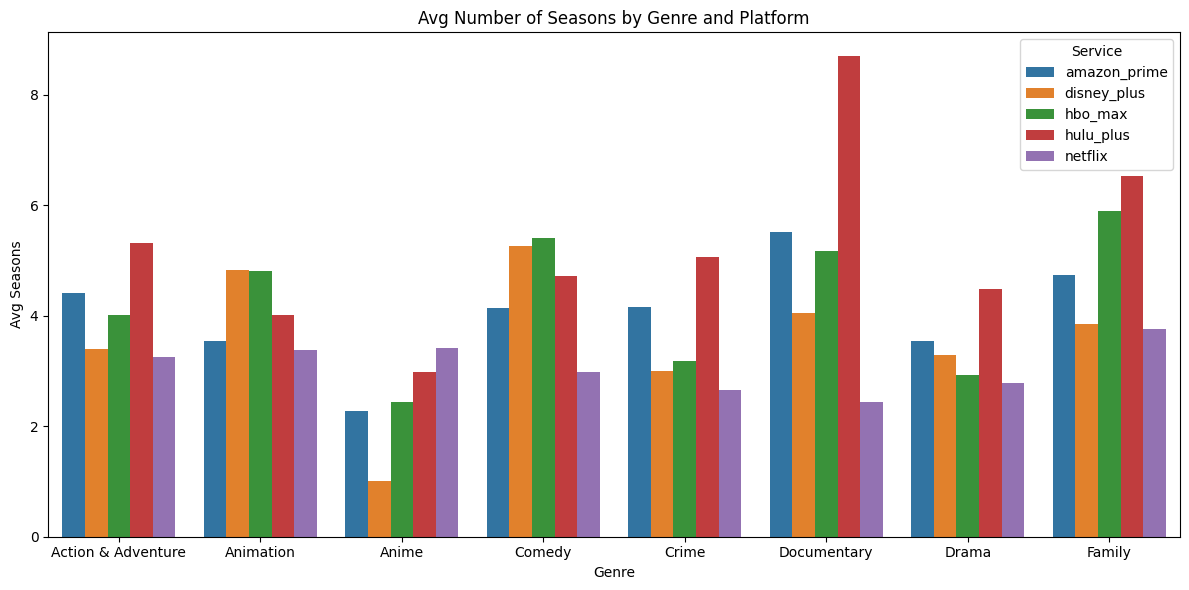

In [8]:
# --------------------------------------------------
# B. Average Seasons by Genre (All + Per Platform)
# --------------------------------------------------
# Clean and explode genres
tv_genre = df[df['Type'] == 'tv'].dropna(subset=['Seasons', 'Genre'])
df_clean = tv_genre.groupby(['Title', 'Service'], as_index=False).agg({
    'Seasons': 'first',
    'Genre': lambda x: ', '.join(sorted(set(x)))
})
df_clean['Genre'] = df_clean['Genre'].str.split(', ')
df_exploded = df_clean.explode('Genre')

# Avg seasons per genre
genre_stats = df_exploded.groupby('Genre')['Seasons'].agg(['count', 'mean', 'median']).reset_index()
genre_stats.columns = ['Genre', 'Num Shows', 'Avg Seasons', 'Median Seasons']

# Avg seasons by genre + service
gen_serv = df_exploded.groupby(['Service', 'Genre'])['Seasons'].mean().reset_index(name='Avg Seasons')
top_genres = df_exploded['Genre'].value_counts().head(8).index.tolist()
gen_serv = gen_serv[gen_serv['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.barplot(data=gen_serv, x='Genre', y='Avg Seasons', hue='Service')
plt.title('Avg Number of Seasons by Genre and Platform')
plt.tight_layout()
plt.show()

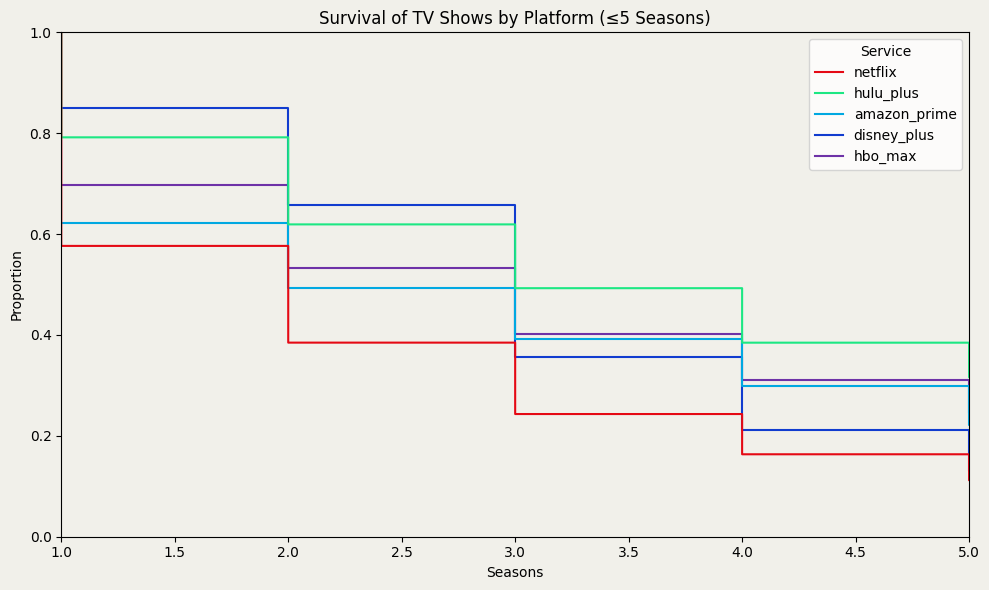

In [9]:
# --------------------------------------------------
# C. Season Survival Curve (ECDF-style)
# --------------------------------------------------
plt.figure(figsize=(10, 6))
ax = sns.ecdfplot(data=base_tv, x='Seasons', hue='Service', complementary=True, palette=platform_palette)
plt.title('Survival of TV Shows by Platform (≤5 Seasons)')
plt.xlim(1, 5)
fig = plt.gcf()
fig.patch.set_facecolor('#f1f0ea')
ax.set_facecolor('#f1f0ea')
plt.tight_layout()
plt.show()


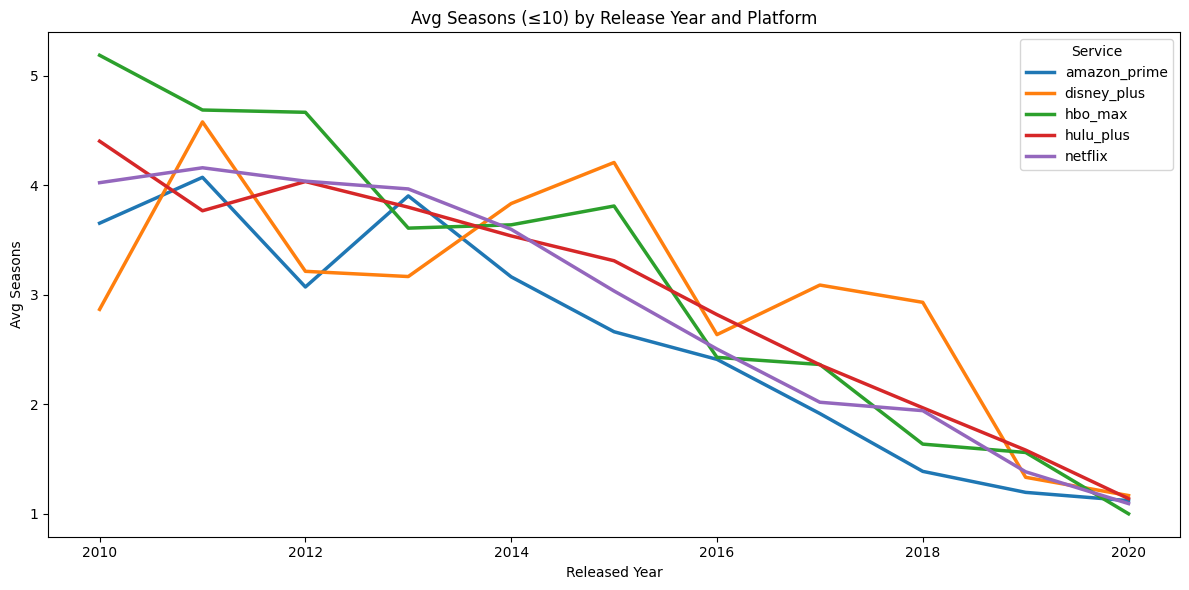

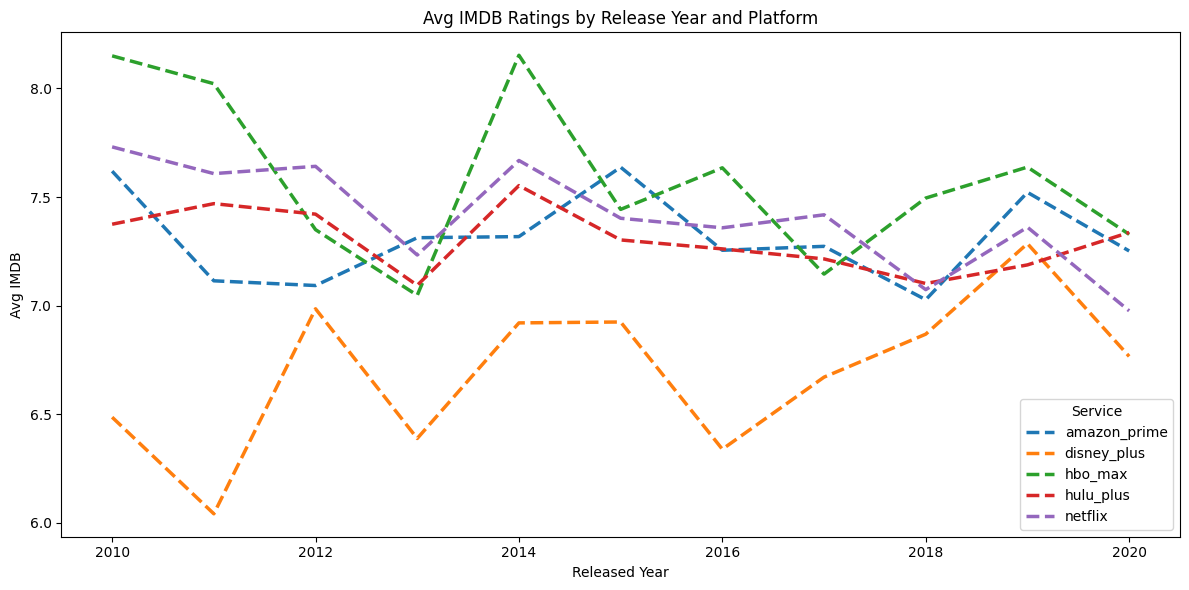

In [10]:

# --------------------------------------------------
# D. Trend: Avg Seasons and IMDB over Time
# --------------------------------------------------
tv_trend = df[(df['Type'] == 'tv') & (df['Seasons'] <= 10) & (df['Released Year'] >= 2010)].dropna(subset=['Seasons', 'Released Year', 'IMDB'])
avg_season = tv_trend.groupby(['Released Year', 'Service'])['Seasons'].mean().reset_index(name='Avg Seasons')
avg_rating = tv_trend.groupby(['Released Year', 'Service'])['IMDB'].mean().reset_index(name='Avg IMDB')
merged = pd.merge(avg_season, avg_rating, on=['Released Year', 'Service'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x='Released Year', y='Avg Seasons', hue='Service', linewidth=2.5)
plt.title('Avg Seasons (≤10) by Release Year and Platform')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x='Released Year', y='Avg IMDB', hue='Service', linewidth=2.5, linestyle='--')
plt.title('Avg IMDB Ratings by Release Year and Platform')
plt.tight_layout()
plt.show()


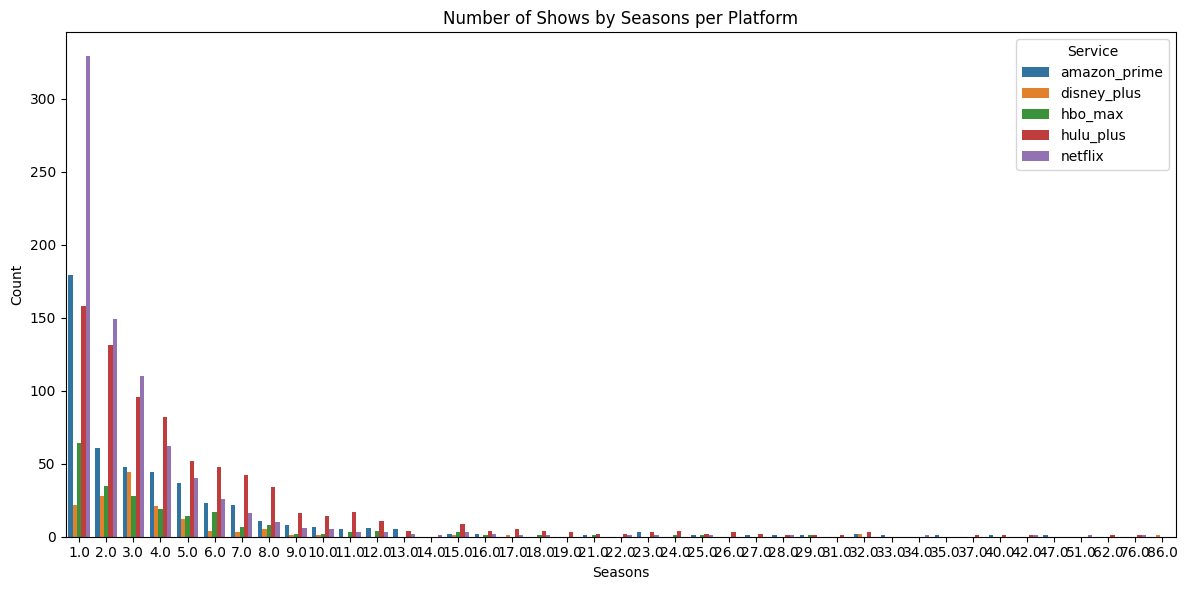

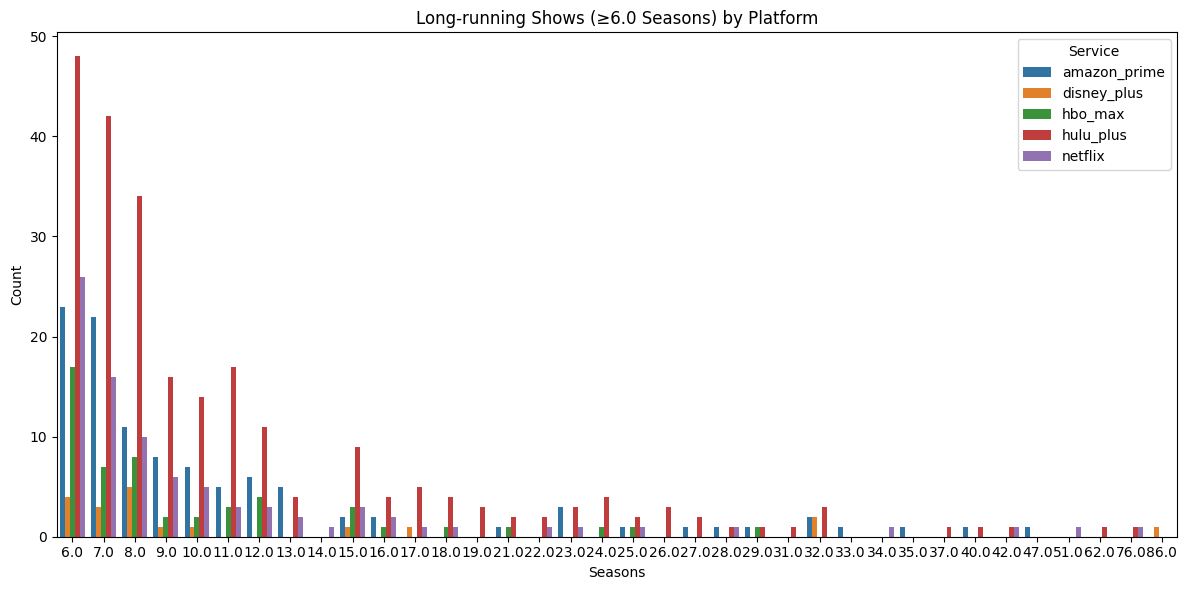

In [11]:

# --------------------------------------------------
# E. Season Count Distributions
# --------------------------------------------------
season_dist = base_tv.groupby(['Seasons', 'Service']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=season_dist, x='Seasons', y='Count', hue='Service')
plt.title('Number of Shows by Seasons per Platform')
plt.tight_layout()
plt.show()

# Long-running shows (80th percentile)
season_75th = base_tv['Seasons'].quantile(0.80)
long_runners = base_tv[base_tv['Seasons'] >= season_75th]
long_dist = long_runners.groupby(['Seasons', 'Service']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=long_dist, x='Seasons', y='Count', hue='Service')
plt.title(f'Long-running Shows (≥{season_75th:.1f} Seasons) by Platform')
plt.tight_layout()
plt.show()


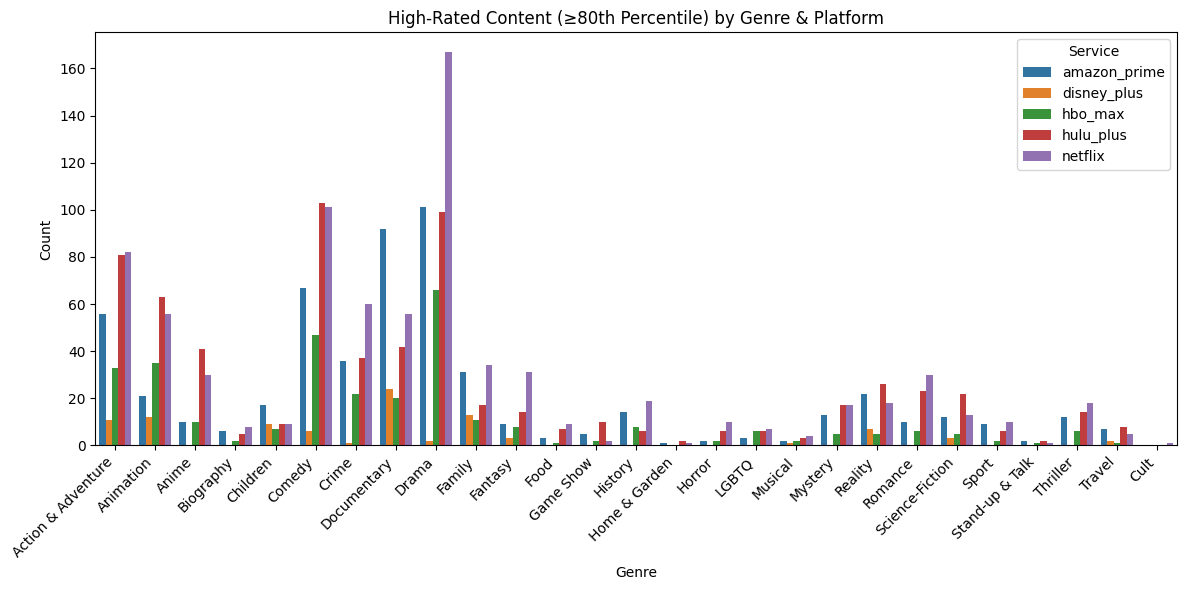

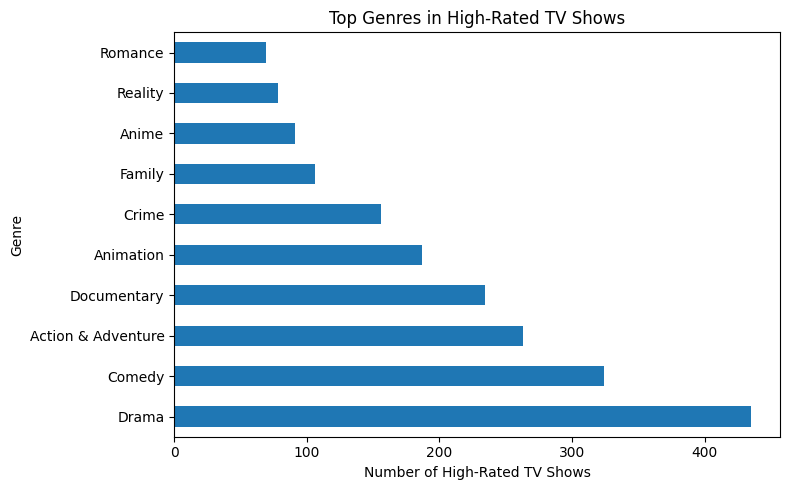

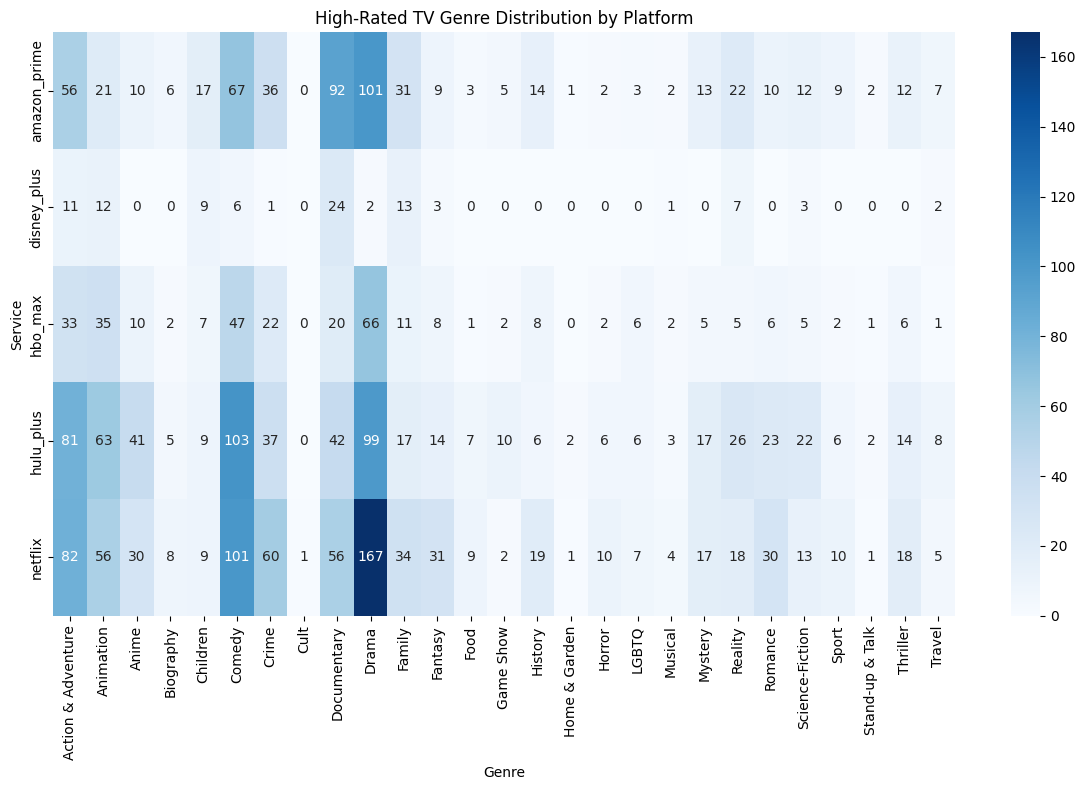

In [12]:

# --------------------------------------------------
# F. High-Rated Genre Insights
# --------------------------------------------------
df_grouped = df.groupby(['Title', 'Service'], as_index=False).agg({
    'IMDB': 'mean',
    'Genre': lambda x: ', '.join(sorted(set(x))),
    'Type': 'first'
})
df_grouped['Genre'] = df_grouped['Genre'].str.split(', ')
df_grouped = df_grouped.explode('Genre')

imdb_80th = df_grouped['IMDB'].quantile(0.80)
high_rated = df_grouped[df_grouped['IMDB'] >= imdb_80th]

# Bar by genre + service
high_counts = high_rated.groupby(['Service', 'Genre']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=high_counts, x='Genre', y='Count', hue='Service')
plt.xticks(rotation=45, ha='right')
plt.title('High-Rated Content (≥80th Percentile) by Genre & Platform')
plt.tight_layout()
plt.show()

# Top genres (TV only)
top_tv = high_rated[high_rated['Type'] == 'tv']
top_genres = top_tv['Genre'].value_counts().head(10)
top_genres.plot(kind='barh', figsize=(8, 5), title='Top Genres in High-Rated TV Shows')
plt.xlabel('Number of High-Rated TV Shows')
plt.tight_layout()
plt.show()

# Heatmap
pivot = top_tv.groupby(['Service', 'Genre']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='d')
plt.title('High-Rated TV Genre Distribution by Platform')
plt.tight_layout()
plt.show()

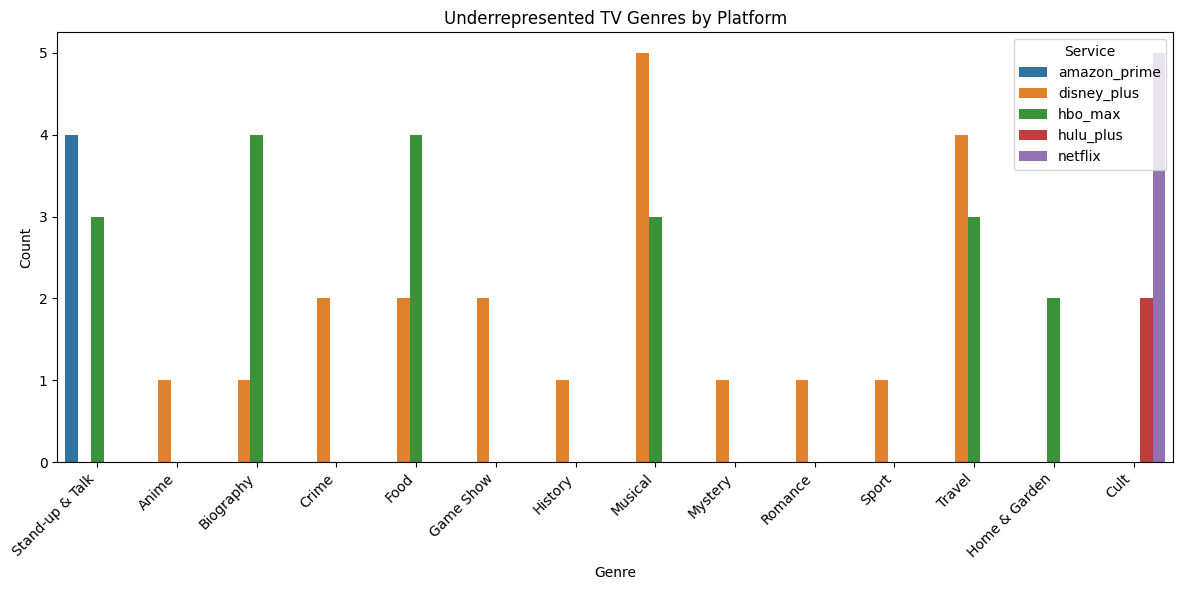

In [13]:
# --------------------------------------------------
# G. Opportunity Gaps (Low-representation Genres)
# --------------------------------------------------
tv_df = df_grouped[df_grouped['Type'] == 'tv'].copy()
tv_df = tv_df.explode('Genre')
tv_genre_counts = tv_df.groupby(['Service', 'Genre']).size().reset_index(name='Count')
threshold = 5
tv_opportunity = tv_genre_counts[tv_genre_counts['Count'] <= threshold]

plt.figure(figsize=(12, 6))
sns.barplot(data=tv_opportunity, x='Genre', y='Count', hue='Service')
plt.xticks(rotation=45, ha='right')
plt.title('Underrepresented TV Genres by Platform')
plt.tight_layout()
plt.show()